In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Əhalinin cins və yaş qrupları üzrə aktiv vərəmlə xəstələnməsi datası
df = pd.read_excel('/content/001_2_10.xls')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,Əhalinin xəstələnməsi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.2.10. Əhalinin cins və yaş qrupları üzrə akt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
4,NaN,İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəst...,3713.000000,4255.000000,4401.000000,4801.000000,4836.000000,4616.000000,4528.000000,4384.000000,3989.000000,3793.000000,3871.000000,3762.0,3613.0,2558.0,2535.0,2877.0,2816.0
5,NaN,kişilər,2823.000000,3201.000000,3244.000000,3532.000000,3386.000000,3293.000000,3270.000000,3164.000000,2763.000000,2582.000000,2530.000000,2497.0,2415.0,1656.0,1680.0,1895.0,1836.0
6,NaN,qadınlar,890.000000,1054.000000,1157.000000,1269.000000,1450.000000,1323.000000,1258.000000,1220.000000,1226.000000,1211.000000,1341.000000,1265.0,1198.0,902.0,855.0,982.0,980.0
7,NaN,o cümlədən yaş qrupları \n və cins üzrə:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0-13 yaşlı - cəmi,175.000000,190.000000,198.000000,244.000000,219.000000,180.000000,179.000000,147.000000,144.000000,151.000000,137.000000,165.0,142.0,69.0,57.0,83.0,99.0
9,NaN,kişilər,120.000000,132.000000,122.000000,152.000000,123.000000,101.000000,102.000000,95.000000,86.000000,98.000000,75.000000,94.0,84.0,36.0,33.0,43.0,48.0


In [3]:
df.shape

(48, 19)

In [4]:
# illər olan sətirləri seçirik
years = df.iloc[3, 2:].tolist() # yeni sütun adları kimi istifadə etmək üçün list-ə çeviririk

# cins/qruplaşma adları olan sütunu götürürük
labels = df.iloc[4:47, 1].tolist()

# əsas məlumatları (kişi, qadın və yaş qrupları) götürürük
data = df.iloc[4:47, 2:]

In [5]:
# təmizlənmiş dataframe qururu1
cleaned_df = pd.DataFrame(columns=years, data=data.values)
cleaned_df['Kateqoriya'] = labels

# sütun adlarının data tipini dəyiş -> int
cleaned_df.columns = [int(col) if col != 'Kateqoriya' else col for col in cleaned_df.columns]

 # Kateqoriya sütunun əlavə edirik
cols = ['Kateqoriya'] + [col for col in cleaned_df.columns if col != 'Kateqoriya']
cleaned_df = cleaned_df[cols]

 # Tarixə aid sütunları rəqəmlərə çeviririk (əgər çevrilə bilmirsə, NaN olacaq)
for col in cleaned_df.columns[1:]:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Bütün dəyərləri NaN olan sətrləri silirik (Kateqoriyanı yox, illəri əsas alırıq)
cleaned_df.dropna(how='all', subset=cleaned_df.columns[1:], inplace=True)
cleaned_df

,Kateqoriya,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəst...,3713.000000,4255.000000,4401.000000,4801.000000,4836.000000,4616.000000,4528.000000,4384.000000,3989.000000,3793.000000,3871.000000,3762.0,3613.0,2558.0,2535.0,2877.0,2816.0
1,kişilər,2823.000000,3201.000000,3244.000000,3532.000000,3386.000000,3293.000000,3270.000000,3164.000000,2763.000000,2582.000000,2530.000000,2497.0,2415.0,1656.0,1680.0,1895.0,1836.0
2,qadınlar,890.000000,1054.000000,1157.000000,1269.000000,1450.000000,1323.000000,1258.000000,1220.000000,1226.000000,1211.000000,1341.000000,1265.0,1198.0,902.0,855.0,982.0,980.0
4,0-13 yaşlı - cəmi,175.000000,190.000000,198.000000,244.000000,219.000000,180.000000,179.000000,147.000000,144.000000,151.000000,137.000000,165.0,142.0,69.0,57.0,83.0,99.0
5,kişilər,120.000000,132.000000,122.000000,152.000000,123.000000,101.000000,102.000000,95.000000,86.000000,98.000000,75.000000,94.0,84.0,36.0,33.0,43.0,48.0
6,qadınlar,55.000000,58.000000,76.000000,92.000000,96.000000,79.000000,77.000000,52.000000,58.000000,53.000000,62.000000,71.0,58.0,33.0,24.0,40.0,51.0
7,14-17 yaşlı - cəmi,223.000000,250.000000,240.000000,310.000000,302.000000,278.000000,323.000000,253.000000,225.000000,211.000000,236.000000,200.0,195.0,145.0,135.0,160.0,152.0
8,kişilər,175.000000,173.000000,184.000000,220.000000,198.000000,187.000000,231.000000,184.000000,156.000000,132.000000,159.000000,135.0,119.0,92.0,83.0,88.0,89.0
9,qadınlar,48.000000,77.000000,56.000000,90.000000,104.000000,91.000000,92.000000,69.000000,69.000000,79.000000,77.000000,65.0,76.0,53.0,52.0,72.0,63.0
10,18-29 yaşlı - cəmi,1479.000000,1656.000000,1807.000000,1959.000000,1882.000000,1726.000000,1637.000000,1570.000000,1354.000000,1292.000000,1306.000000,1258.0,1178.0,777.0,708.0,700.0,672.0


In [6]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 42
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kateqoriya  41 non-null     object 
 1   2007        41 non-null     float64
 2   2008        41 non-null     float64
 3   2009        41 non-null     float64
 4   2010        41 non-null     float64
 5   2011        41 non-null     float64
 6   2012        41 non-null     float64
 7   2013        41 non-null     float64
 8   2014        41 non-null     float64
 9   2015        41 non-null     float64
 10  2016        41 non-null     float64
 11  2017        41 non-null     float64
 12  2018        41 non-null     float64
 13  2019        41 non-null     float64
 14  2020        41 non-null     float64
 15  2021        41 non-null     float64
 16  2022        41 non-null     float64
 17  2023        41 non-null     float64
dtypes: float64(17), object(1)
memory usage: 6.1+ KB


In [7]:
cleaned_df.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,382.100937,437.540752,452.619199,493.558446,497.395955,474.579852,465.561087,450.198193,409.599372,389.171966,397.501354,386.090244,370.948780,262.390244,259.873171,294.914634,288.407317
std,759.324026,865.331571,888.789388,966.333588,957.321968,917.287941,899.869193,874.032165,784.681237,744.060451,751.861338,730.792409,701.971122,495.465124,493.619289,556.262963,542.964537
min,6.100000,6.511001,8.648157,10.509481,10.856044,8.785587,8.422665,5.585392,6.110698,5.488162,6.400000,7.200000,5.700000,3.100000,2.400000,3.900000,4.500000
25%,32.900000,36.761195,47.602661,52.914798,53.471006,50.306240,51.309408,46.563499,42.524773,41.977453,45.900000,39.300000,38.300000,25.800000,25.200000,29.400000,27.900000
50%,73.100000,79.718866,85.340512,91.367007,96.000000,84.543839,86.938981,75.631068,72.121346,72.000000,75.000000,71.000000,76.000000,46.700000,50.500000,52.900000,51.000000
75%,273.000000,315.000000,293.000000,310.000000,310.000000,296.000000,323.000000,321.000000,309.000000,287.000000,330.000000,304.000000,289.000000,241.000000,228.000000,278.000000,268.000000
max,3713.000000,4255.000000,4401.000000,4801.000000,4836.000000,4616.000000,4528.000000,4384.000000,3989.000000,3793.000000,3871.000000,3762.000000,3613.000000,2558.000000,2535.000000,2877.000000,2816.000000


# Data 1 - Time Series Modeling

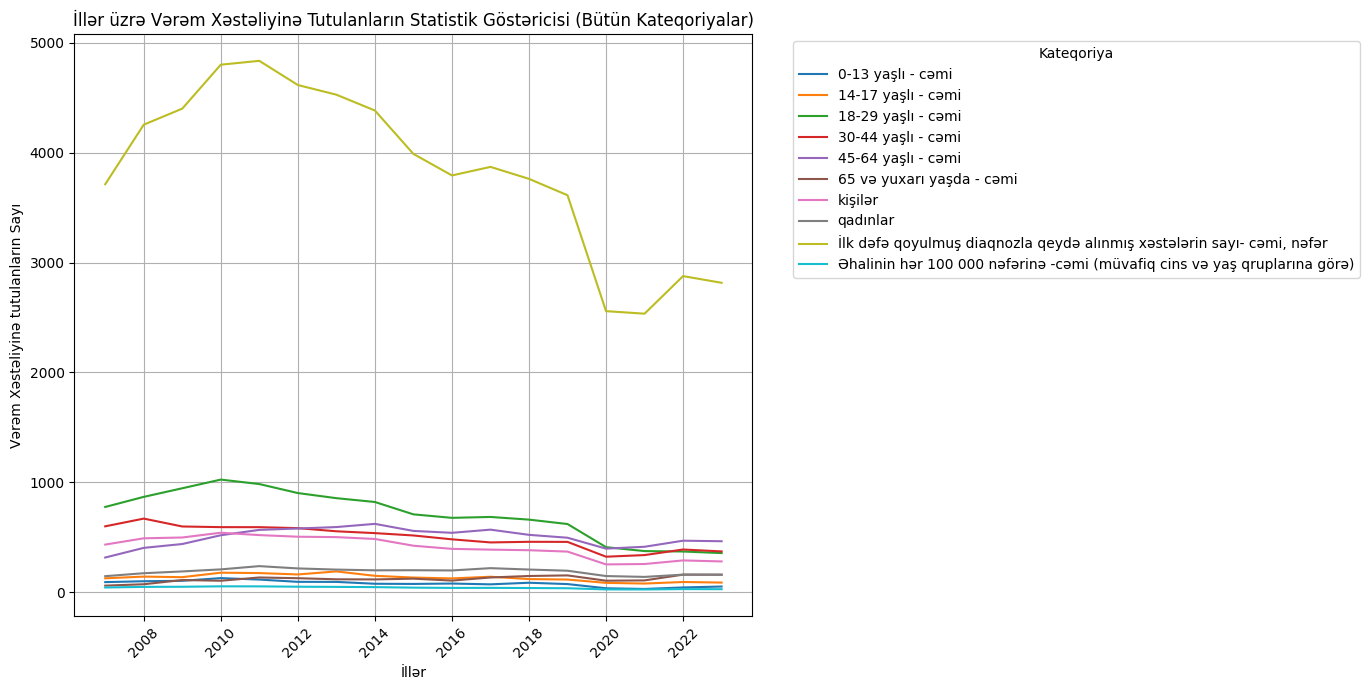

In [18]:
# Datanı transpose edirik
cleaned_df_transposed = cleaned_df.melt(id_vars='Kateqoriya', var_name='Illər', value_name='Nəticə')
pivot_df = cleaned_df_transposed.pivot_table(index='Illər', columns='Kateqoriya', values='Nəticə', aggfunc='mean')

# İlləri ədədə çevir
pivot_df.index = pivot_df.index.astype(int)
pivot_df.plot(figsize=(14,7))
plt.title('İllər üzrə Vərəm Xəstəliyinə Tutulanların Statistik Göstəricisi (Bütün Kateqoriyalar)')
plt.xlabel('İllər')
plt.ylabel('Vərəm Xəstəliyinə tutulanların Sayı')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Kateqoriya', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
pivot_df

Kateqoriya,0-13 yaşlı - cəmi,14-17 yaşlı - cəmi,18-29 yaşlı - cəmi,30-44 yaşlı - cəmi,45-64 yaşlı - cəmi,65 və yuxarı yaşda - cəmi,kişilər,qadınlar,"İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər",Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)
Illər,,,,,,,,,,
2007,92.050000,126.600000,776.050000,599.750000,315.850000,60.100000,433.562753,146.100000,3713.0,43.159865
2008,100.016634,142.289073,867.859433,670.108696,403.743739,72.631222,490.868551,173.069943,4255.0,48.804267
2009,104.280000,137.069701,946.170256,598.436538,438.801331,110.808404,498.161770,189.317940,4401.0,49.856695
2010,128.511876,177.864729,1025.183504,592.425987,518.694157,104.553800,541.633383,207.986470,4801.0,53.736723
2011,115.273185,174.414483,984.476252,592.129676,567.417206,134.336858,519.922345,237.600603,4836.0,53.418166
2012,94.659109,161.861842,902.590788,583.366245,579.988930,127.604732,505.300173,216.701690,4616.0,50.306240
2013,94.051696,189.465368,856.030377,554.654704,593.160612,117.716770,501.591213,206.066431,4528.0,48.704931
2014,77.168031,149.424973,821.245267,537.982693,622.098533,116.609392,484.695214,199.443974,4384.0,46.563499
2015,75.524441,133.606427,708.768452,516.553939,558.079978,123.559997,423.283958,200.350155,3989.0,41.860367


In [20]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

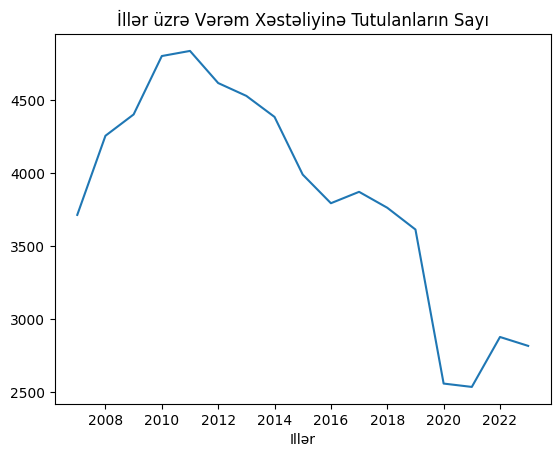

In [22]:
ts = pivot_df['İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər']
ts.index = pivot_df.index.astype(int) # illər üçün indeksləşmə
ts.plot(title='İllər üzrə Vərəm Xəstəliyinə Tutulanların Sayı')
plt.show();

In [23]:
# Stasionarlığ yoxlamaq - ADF testi
res = adfuller(ts)
adf_stats = res[0]
print(adf_stats)
if res[1] < 0.05:
  print('Bu stasionar seriyadır')
else:
  print('Bu qeyri-stasionar seriyadır')

-0.07728670546128277
Bu qeyri-stasionar seriyadır


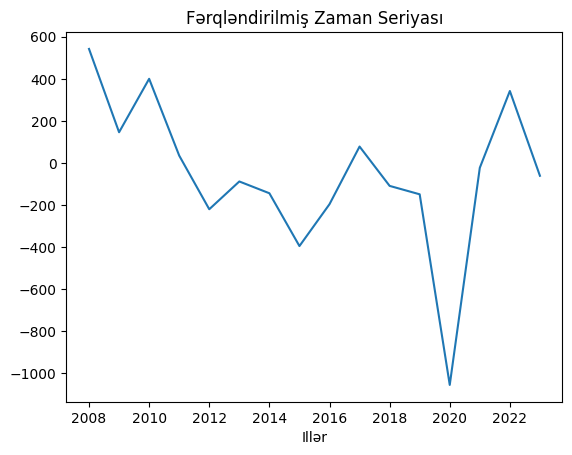

In [26]:
# Differensiya etmə (qeyri-stasionar olmağına görə)
ts_diff = ts.diff().dropna()
ts_diff.plot(title='Fərqləndirilmiş Zaman Seriyası')
plt.show();

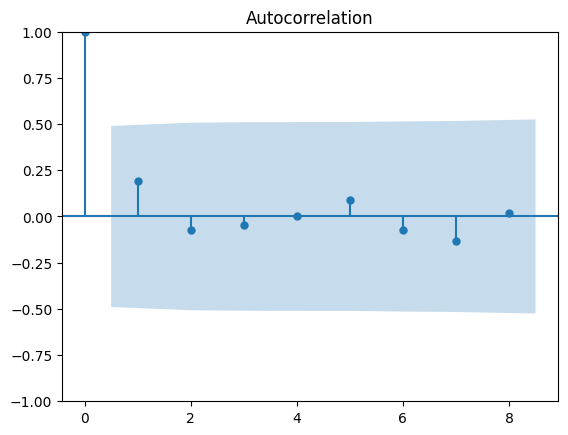

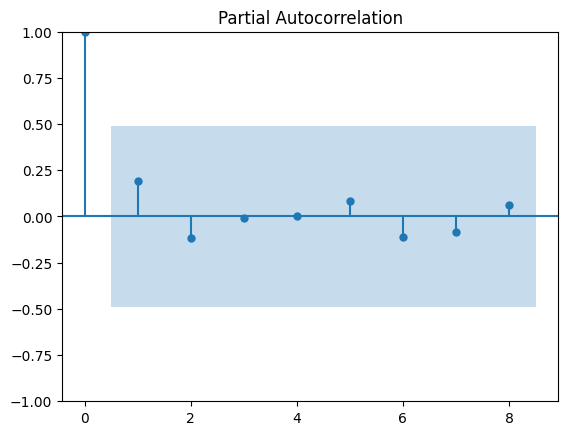

In [30]:
# ACF və PACF
plot_acf(tf_diff)
plt.show();
plot_pacf(tf_diff)
plt.show();

In [32]:
# ARIMA modeli qururuq
arima_model = ARIMA(ts,order=(1,1,1))
arima_model.fit()

In [33]:
arima_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         SARIMAX Results                                                          
==================================================================================================================================
Dep. Variable:     İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər   No. Observations:                   17
Model:                                                                     ARIMA(1, 1, 1)   Log Likelihood                -115.608
Date:                                                                    Fri, 30 May 2025   AIC                            237.216
Time:                                                                            09:31:21   BIC                            239.534
Sample:                                                                                 0   HQIC                           237.335
                                                                                     - 17                                         
Covariance Type:                                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1847      1.840     -0.100      0.920      -3.792       3.423
ma.L1          0.5501      1.783      0.309      0.758      -2.944       4.044
sigma2      1.164e+05   3.98e+04      2.925      0.003    3.84e+04    1.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 9.53
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               3.50   Skew:                            -1.30
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

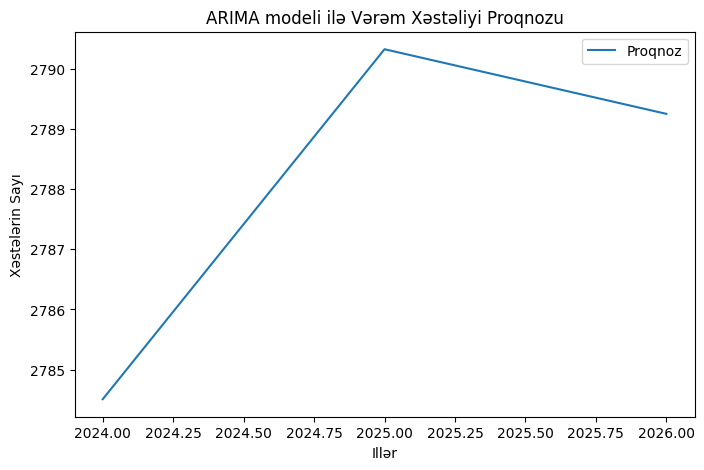

In [37]:
# növbəti 3 il üçün proqnoz
forecasting = arima_model.fit().forecast(steps=3)
plt.figure(figsize=(8,5))
plt.plot(range(ts.index[-1]+1, ts.index[-1]+4), forecasting, label='Proqnoz')
plt.title('ARIMA modeli ilə Vərəm Xəstəliyi Proqnozu')
plt.xlabel('Illər')
plt.ylabel('Xəstələrin Sayı')
plt.legend()
plt.show()

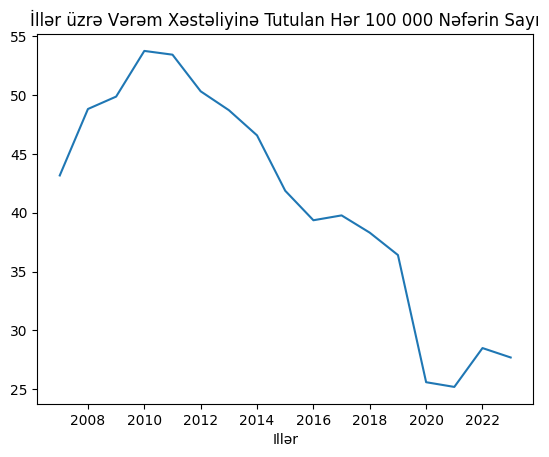

In [40]:
ts_peop = pivot_df['Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)']
ts_peop.index = pivot_df.index.astype(int) # illər üçün indeksləşmə
ts_peop.plot(title='İllər üzrə Vərəm Xəstəliyinə Tutulan Hər 100 000 Nəfərin Sayı')
plt.show();

In [41]:
# Stasionarlığ yoxlamaq - ADF testi
res_2 = adfuller(ts_peop)
adf_stats_2 = res_2[0]
print(adf_stats_2)
if res_2[1] < 0.05:
  print('Bu stasionar seriyadır')
else:
  print('Bu qeyri-stasionar seriyadır')

-0.08415062985384758
Bu qeyri-stasionar seriyadır


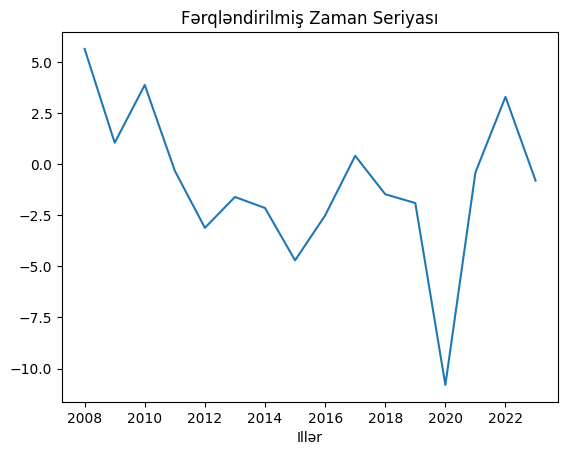

In [42]:
# Differensiya etmə (qeyri-stasionar olmağına görə)
ts_diff_peop = ts_peop.diff().dropna()
ts_diff_peop.plot(title='Fərqləndirilmiş Zaman Seriyası')
plt.show();

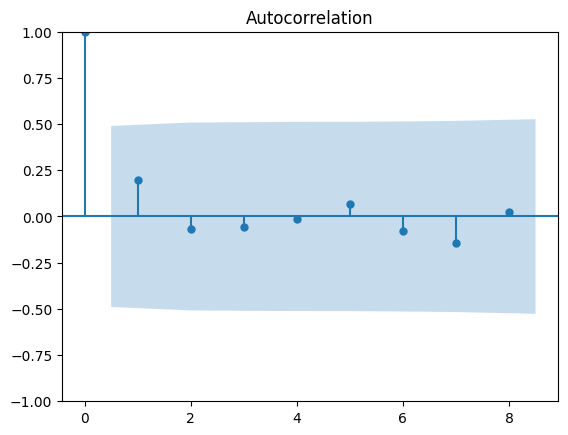

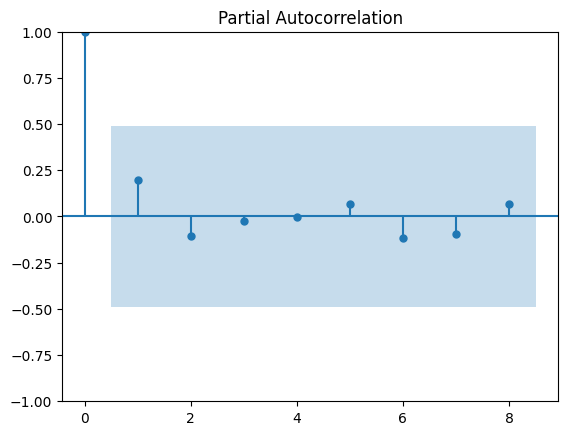

In [45]:
# ACF və PACF
plot_acf(ts_diff_peop)
plt.show();
plot_pacf(ts_diff_peop)
plt.show();

In [46]:
# ARIMA modeli qururuq
arima_model_2 = ARIMA(ts_peop,order=(1,1,1))
arima_model_2.fit()

In [47]:
arima_model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                           SARIMAX Results                                                           
=====================================================================================================================================
Dep. Variable:     Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)   No. Observations:                   17
Model:                                                                        ARIMA(1, 1, 1)   Log Likelihood                 -43.236
Date:                                                                       Fri, 30 May 2025   AIC                             92.472
Time:                                                                               09:43:34   BIC                             94.790
Sample:                                                                                    0   HQIC                            92.591
                                                                                        - 17                                         
Covariance Type:                                                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0180      1.367     -0.013      0.989      -2.696       2.660
ma.L1          0.3418      1.241      0.275      0.783      -2.091       2.774
sigma2        12.9308      4.378      2.953      0.003       4.349      21.512
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.68   Prob(JB):                         0.24
Heteroskedasticity (H):               2.28   Skew:                            -0.73
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

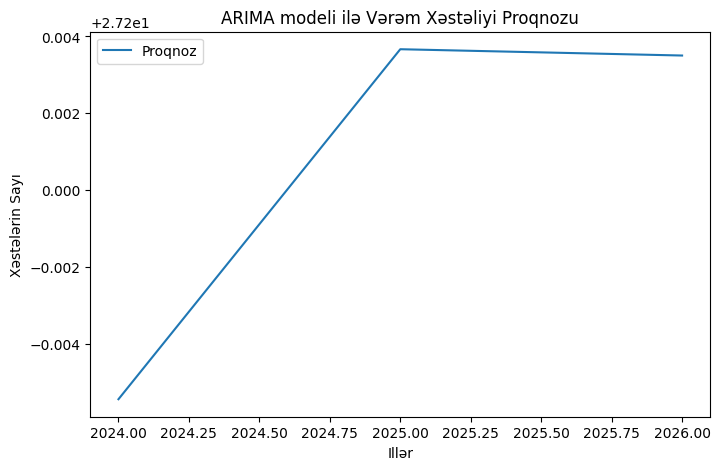

In [48]:
# növbəti 3 il üçün proqnoz
forecasting = arima_model_2.fit().forecast(steps=3)
plt.figure(figsize=(8,5))
plt.plot(range(ts.index[-1]+1, ts.index[-1]+4), forecasting, label='Proqnoz')
plt.title('ARIMA modeli ilə Vərəm Xəstəliyi Proqnozu')
plt.xlabel('Illər')
plt.ylabel('Xəstələrin Sayı')
plt.legend()
plt.show()

In [ ]:
df2 = pd.read_excel('/content/001_2_6.xls')
df2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,Əhalinin xəstələnməsi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.2.6. Əhalinin ayrı-ayrı infeksion və parazit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2000.000000,2005,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,NaN,Ümumi kəskin bağırsaq infeksiyaları,7327.000000,10520,13762,12769,11737,13551,12876,13923,...,14496,14306,15880,16017,13182,13504,7601,6680,9436,10430
5,NaN,"Qarın yatalağı və paratif A,B,C",15.000000,11,5,1,3,7,-,-,...,-,-,-,-,-,-,-,-,-,-
6,NaN,Salmonelyoz infeksiyaları,551.000000,570,422,410,356,301,252,406,...,515,503,741,531,594,359,120,32,86,77
7,NaN,Viruslu hepatitlər,2381.000000,1691,2223,2364,1861,1233,780,665,...,435,329,319,373,307,359,206,130,162,429
8,NaN,Qrip və yuxarı tənəffüs yollarının kəskin infe...,327596.000000,352077,371339,388265,393632,343328,362332,380788,...,400163,397777,403207,354928,347494,337140,229123,638644,495119,340933
9,NaN,Skarlatin,123.000000,52,43,81,185,144,233,200,...,236,168,160,181,151,189,72,22,121,733


In [ ]:
df2.shape

(41, 21)

In [ ]:
# illər olan sətirləri seçirik
years = df2.iloc[3, 2:].tolist() # yeni sütun adları kimi istifadə etmək üçün list-ə çeviririk

# xəstəlik adları olan sütunu götürürük
diseases = df2.iloc[4:40, 1].tolist()

# əsas məlumatları götürürük
data = df2.iloc[4:40, 2:]

In [ ]:
# təmizlənmiş dataframe qururuq
clean_df = pd.DataFrame(columns=years, data=data.values)
clean_df

,2000.0,2005.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,7327.0,10520,13762,12769,11737,13551,12876,13923,13476,14496,14306,15880,16017,13182,13504,7601,6680,9436,10430
1,15.0,11,5,1,3,7,-,-,-,-,-,-,-,-,-,-,-,-,-
2,551.0,570,422,410,356,301,252,406,673,515,503,741,531,594,359,120,32,86,77
3,2381.0,1691,2223,2364,1861,1233,780,665,524,435,329,319,373,307,359,206,130,162,429
4,327596.0,352077,371339,388265,393632,343328,362332,380788,400280,400163,397777,403207,354928,347494,337140,229123,638644,495119,340933
5,123.0,52,43,81,185,144,233,200,188,236,168,160,181,151,189,72,22,121,733
6,2.0,-,4,3,2,-,-,-,-,-,-,-,-,-,-,-,-,-,-
7,11.0,2,12,5,5,14,25,18,4,-,-,-,-,-,-,-,-,-,3
8,3.0,-,2,6,1,3,6,7,5,9,8,13,7,9,11,9,4,6,7
9,212.0,1238,-,5,-,-,-,-,102,1,-,-,-,52,337,2,-,1,13207
